<a href="https://colab.research.google.com/github/mamoueli/Image-Emotion-Recognition/blob/main/AffectNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset loading and extraction from google drive


In [ ]:
import os
import tarfile
import numpy as np
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define Paths
TAR_FILE = "/content/drive/MyDrive/colab_data/datasets/affect/train_set.tar"  # Change if needed
EXTRACTED_FOLDER = "/content/affectnet"

# Step 3: Extract the dataset if not already extracted
if not os.path.exists(EXTRACTED_FOLDER):
    print("Extracting dataset... This may take a while.")
    with tarfile.open(TAR_FILE, 'r') as tar_ref:
        tar_ref.extractall(EXTRACTED_FOLDER)
    print("Dataset extracted successfully!")

# Step 4: Check structure & update paths if needed
print("Checking extracted folder structure...")
print(os.listdir(EXTRACTED_FOLDER))


images_folder = "/content/affectnet/train_set/images"
annotations_folder = "/content/affectnet/train_set/annotations"

if not os.path.exists(annotations_folder):
    # Look for deeper folder structures
    for root, dirs, files in os.walk(EXTRACTED_FOLDER):
        if "annotations" in dirs:
            annotations_folder = os.path.join(root, "annotations")
            images_folder = os.path.join(root, "images")
            print(f"Found annotations folder at: {annotations_folder}")
            break

# Ensure folders exist
if not os.path.exists(annotations_folder):
    raise FileNotFoundError(f"Could not find annotations folder in {EXTRACTED_FOLDER}")

# Step 5: Load and print annotations for sample images
def load_annotations(image_index):
    """
    Load and print annotation data for a specific image index.
    """
    aro_file = os.path.join(annotations_folder, f"{image_index}_aro.npy")
    exp_file = os.path.join(annotations_folder, f"{image_index}_exp.npy")
    lnd_file = os.path.join(annotations_folder, f"{image_index}_lnd.npy")
    val_file = os.path.join(annotations_folder, f"{image_index}_val.npy")

    try:
        aro = np.load(aro_file)
        exp = np.load(exp_file)
        lnd = np.load(lnd_file)
        val = np.load(val_file)

        print(f"\nAnnotations for Image {image_index}:")
        print(f"Arousal (aro): {aro}")
        print(f"Expression (exp): {exp}")
        print(f"Landmarks (lnd): {lnd.shape} -> {lnd[:5]} (showing first 5 landmarks)")
        print(f"Valence (val): {val}")

    except FileNotFoundError as e:
        print(f"Missing annotation file for image {image_index}: {e}")

# Step 6: Test with sample images
sample_indices = [0, 100]  # Change these indices if needed

for idx in sample_indices:
    load_annotations(idx)

Mounted at /content/drive
Extracting dataset... This may take a while.
Dataset extracted successfully!
Checking extracted folder structure...
['train_set']

Annotations for Image 0:
Arousal (aro): -0.0555556
Expression (exp): 1
Landmarks (lnd): (136,) -> [ 11.87025584  92.03710145  13.53468298 114.50898551  15.2240267 ] (showing first 5 landmarks)
Valence (val): 0.785714

Annotations for Image 100:
Arousal (aro): -0.00862664
Expression (exp): 0
Landmarks (lnd): (136,) -> [-68.91024209  83.63500931 -65.58569832 123.92998138 -57.10540037] (showing first 5 landmarks)
Valence (val): 0.00862664


load certain images and respective annotations to ensure proper handling

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


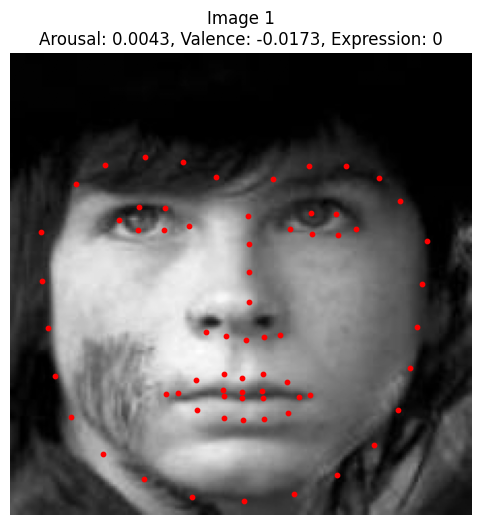

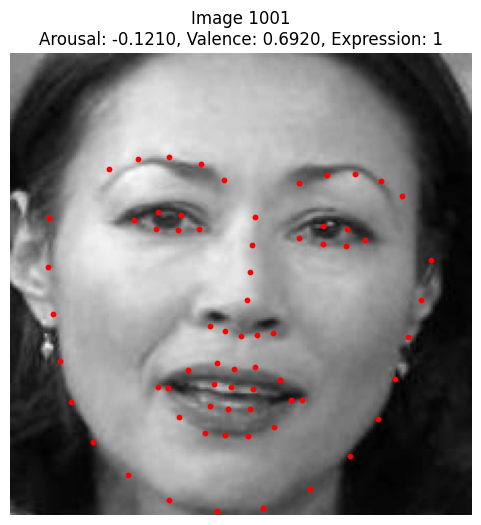

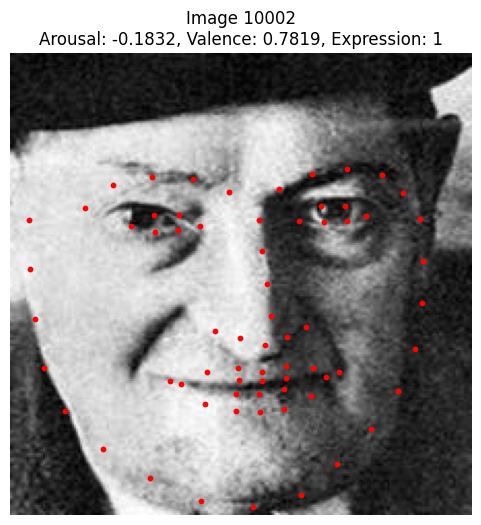

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset paths
IMAGES_FOLDER = "/content/affectnet/train_set/images"
ANNOTATIONS_FOLDER = "/content/affectnet/train_set/annotations"

# Sample image indices to visualize
SAMPLE_INDICES = [1, 1001, 10002]

# Function to load and visualize image with landmarks
def visualize_image(image_index):
    """
    Loads an image, overlays its landmarks, and prints annotations.
    """
    img_path = os.path.join(IMAGES_FOLDER, f"{image_index}.jpg")  # Ensure correct extension
    aro_file = os.path.join(ANNOTATIONS_FOLDER, f"{image_index}_aro.npy")
    exp_file = os.path.join(ANNOTATIONS_FOLDER, f"{image_index}_exp.npy")
    lnd_file = os.path.join(ANNOTATIONS_FOLDER, f"{image_index}_lnd.npy")
    val_file = os.path.join(ANNOTATIONS_FOLDER, f"{image_index}_val.npy")

    try:
        # Load image in grayscale mode
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # ✅ Ensures grayscale (H, W)
        if image is None:
            print(f"Error: Image {img_path} not found.")
            return

        # Add a channel dimension to make it compatible with transforms (H, W, 1)
        image = np.expand_dims(image, axis=-1)

        # Load annotations
        aro = float(np.load(aro_file))  # Convert to float
        exp = int(np.load(exp_file))    # Convert to int
        lnd = np.load(lnd_file)         # Load landmarks
        val = float(np.load(val_file))  # Convert to float

        #Reshape landmarks if needed (assuming it's (68,2) for facial keypoints)
        if lnd.shape[0] == 136:
            lnd = lnd.reshape(68, 2)  # Convert from (136,) → (68,2)

        # Plot grayscale image properly
        plt.figure(figsize=(6, 6))
        plt.imshow(image.squeeze(), cmap='gray')  # ✅ Force grayscale display
        plt.scatter(lnd[:, 0], lnd[:, 1], c='red', s=10)  # Plot landmarks
        plt.title(f"Image {image_index}\nArousal: {aro:.4f}, Valence: {val:.4f}, Expression: {exp}")
        plt.axis("off")

        # Show the plot
        plt.show()

    except FileNotFoundError as e:
        print(f"Missing annotation file for image {image_index}: {e}")

# Visualize each sample
for idx in SAMPLE_INDICES:
    visualize_image(idx)

provide dataset statistics


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== AffectNet Dataset Statistics ===
Total Samples: 287651
Neutral: 74874 samples
Happiness: 134415 samples
Sadness: 25459 samples
Surprise: 14090 samples
Fear: 6378 samples
Disgust: 3803 samples
Anger: 24882 samples
Contempt: 3750 samples


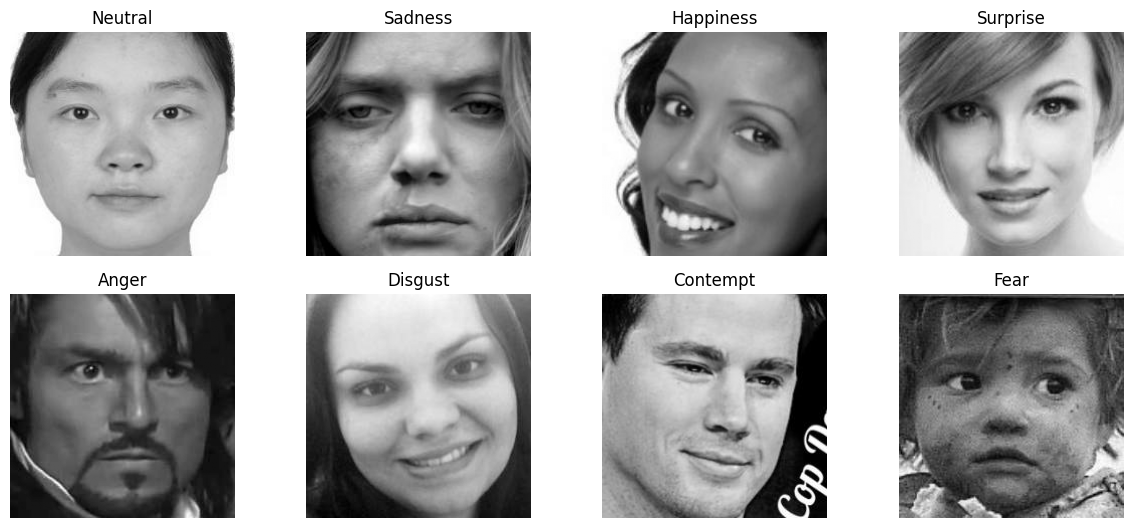

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset paths (update if needed)
IMAGES_FOLDER = "/content/affectnet/train_set/images"
ANNOTATIONS_FOLDER = "/content/affectnet/train_set/annotations"

# Define expression class labels
expression_labels = {
    0: "Neutral", 1: "Happiness", 2: "Sadness", 3: "Surprise",
    4: "Fear", 5: "Disgust", 6: "Anger", 7: "Contempt",
    8: "None", 9: "Uncertain", 10: "No-Face"
}

#Initialize counter for class distribution
expression_counts = Counter()

# Dictionary to store one example image per class
example_images = {}

#Iterate through all annotation files
for file in os.listdir(ANNOTATIONS_FOLDER):
    if file.endswith("_exp.npy"):  # Process only expression files
        image_index = file.split("_")[0]  # Extract image index
        exp_path = os.path.join(ANNOTATIONS_FOLDER, file)

        try:
            expression = int(np.load(exp_path))  # Load expression label
            expression_counts[expression] += 1  # Count samples per class

            # Store first example for each class
            if expression not in example_images:
                example_images[expression] = image_index

        except Exception as e:
            print(f"Error reading {file}: {e}")

# Print dataset statistics
print("\n=== AffectNet Dataset Statistics ===")
total_samples = sum(expression_counts.values())
print(f"Total Samples: {total_samples}")

for exp, count in sorted(expression_counts.items()):
    print(f"{expression_labels.get(exp, 'Unknown')}: {count} samples")

#  Function to visualize an example image from each class
def visualize_expression_examples(example_images):
    plt.figure(figsize=(12, 8))
    count = 0

    for exp, img_index in example_images.items():
        img_path = os.path.join(IMAGES_FOLDER, f"{img_index}.jpg")

        # Load image in grayscale mode
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            continue  # Skip if image is missing

        # Add a channel dimension to make it compatible with transforms (H, W, 1)
        image = np.expand_dims(image, axis=-1)

        count += 1
        plt.subplot(3, 4, count)
        plt.imshow(image.squeeze(), cmap='gray')  # Force grayscale display
        plt.title(expression_labels.get(exp, f"Class {exp}"))
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Show an example image from each category
visualize_expression_examples(example_images)

Training with weight loss/oversampling/augmentation so that data imbalance is considered. Annotation loading is also considered

In [ ]:
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 114.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from collections import Counter
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
from sklearn.model_selection import train_test_split

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset paths
DATASET_PATH = "/content/affectnet/train_set"
IMAGES_FOLDER = os.path.join(DATASET_PATH, "images")
ANNOTATIONS_FOLDER = os.path.join(DATASET_PATH, "annotations")

# Define emotion labels
emotion_labels = {
    0: "Neutral", 1: "Happiness", 2: "Sadness", 3: "Surprise",
    4: "Fear", 5: "Disgust", 6: "Anger", 7: "Contempt"
}

# Data Augmentation (Moderated)
def augmentation_transform():
    return A.Compose([
        A.HorizontalFlip(p=0.2),
        A.RandomBrightnessContrast(p=0.1),
        A.GaussianBlur(blur_limit=(3, 5), p=0.1),
        A.Rotate(limit=5, p=0.1),
        A.RandomResizedCrop(224, 224, scale=(0.8, 1.0), p=0.2),  # NEW: Forces model to focus on different areas
        A.Normalize(mean=[0.5], std=[0.5]),
        ToTensorV2(),
    ])

# Custom Dataset
class AffectNetDataset(Dataset):
    def __init__(self, images_folder, annotations_folder, transform=None):
        self.images_folder = images_folder
        self.annotations_folder = annotations_folder
        self.image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg') or f.endswith('.png')]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_filename = self.image_files[idx]
        img_index = os.path.splitext(img_filename)[0]  # Get numeric index
        img_path = os.path.join(self.images_folder, img_filename)

        # Load image and convert to grayscale
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"Image {img_path} not found.")

        image = np.expand_dims(image, axis=-1)  # Add channel dimension

        # Load annotation
        try:
            exp = int(np.load(os.path.join(self.annotations_folder, f"{img_index}_exp.npy")))
        except Exception as e:
            raise FileNotFoundError(f"Missing annotation for {img_index}: {e}")

        # Apply augmentation
        if self.transform:
            image = self.transform(image=image)["image"]
        else:
            image = transforms.ToTensor()(image)  # Convert to PyTorch tensor

        return image, exp

# Load Dataset and Create Train/Validation Split
full_dataset = AffectNetDataset(IMAGES_FOLDER, ANNOTATIONS_FOLDER, transform=augmentation_transform())

train_indices, val_indices = train_test_split(
    range(len(full_dataset)), test_size=0.1,
    stratify=[full_dataset[i][1] for i in range(len(full_dataset))],
    random_state=42
)
train_subset = torch.utils.data.Subset(full_dataset, train_indices)
val_subset = torch.utils.data.Subset(full_dataset, val_indices)

# Compute Class Distribution
class_counts = Counter([label for _, label in train_subset])
num_classes = len(emotion_labels)

print("\nTraining Dataset Class Distribution:")
for class_idx, count in class_counts.items():
    print(f"{emotion_labels[class_idx]}: {count} samples")

# Compute Class Weights for Moderated Balancing
class_weights = torch.tensor(
    [(1.0 / (class_counts[i] + 1)) ** 0.25 for i in range(num_classes)], dtype=torch.float32
).to(device)

# Weighted Loss Function
weighted_loss_function = nn.CrossEntropyLoss(weight=class_weights)

# DataLoaders
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Initialize ResNet-50 for Transfer Learning
print("\nInitializing ResNet50...")
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

# Modify first convolutional layer for grayscale input
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Modify final fully connected layer for emotion classification
in_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(in_features, num_classes)
).to(device)

# Move model to GPU/CPU
model = model.to(device)

# Define optimizer and scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", patience=2, factor=0.5, verbose=True)

# Early Stopping Setup
patience = 3
best_val_loss = float('inf')
patience_counter = 0

# Training Loop with Early Stopping
num_epochs = 10
print("\nStarting Training...\n")
start_time = time.time()

for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0.0
    print(f"Epoch [{epoch+1}/{num_epochs}] in progress...")

    for batch_idx, (images, labels) in enumerate(train_loader, start=1):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = weighted_loss_function(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # Validation Phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = weighted_loss_function(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    # Update Learning Rate Scheduler
    scheduler.step(avg_val_loss)

    # Early Stopping Check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "/content/best_model.pth")
        print(" Validation loss improved, saving model!")
    else:
        patience_counter += 1
        print(f"No improvement for {patience_counter}/{patience} epochs.")

    if patience_counter >= patience:
        print("\nEarly stopping triggered!")
        break

print(f"\nTraining complete in {(time.time() - start_time) / 60:.2f} minutes")

# Load Best Model Before Testing
model.load_state_dict(torch.load("/content/best_model.pth"))
print(" Loaded best model from early stopping checkpoint.")

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Using device: cuda

Training Dataset Class Distribution:
Neutral: 67386 samples
Happiness: 120973 samples
Sadness: 22913 samples
Anger: 22394 samples
Surprise: 12681 samples
Contempt: 3375 samples
Fear: 5740 samples
Disgust: 3423 samples

Initializing ResNet50...


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 202MB/s]



Starting Training...

Epoch [1/10] in progress...


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/10] - Training Loss: 1.1025, Validation Loss: 0.9947
 Validation loss improved, saving model!
Epoch [2/10] in progress...
Epoch [2/10] - Training Loss: 0.9766, Validation Loss: 0.9449
 Validation loss improved, saving model!
Epoch [3/10] in progress...
Epoch [3/10] - Training Loss: 0.9381, Validation Loss: 0.9021
 Validation loss improved, saving model!
Epoch [4/10] in progress...
Epoch [4/10] - Training Loss: 0.9178, Validation Loss: 0.9121
No improvement for 1/3 epochs.
Epoch [5/10] in progress...
Epoch [5/10] - Training Loss: 0.9064, Validation Loss: 0.8793
 Validation loss improved, saving model!
Epoch [6/10] in progress...
Epoch [6/10] - Training Loss: 0.8992, Validation Loss: 0.8775
 Validation loss improved, saving model!
Epoch [7/10] in progress...
Epoch [7/10] - Training Loss: 0.8929, Validation Loss: 0.8729
 Validation loss improved, saving model!
Epoch [8/10] in progress...
Epoch [8/10] - Training Loss: 0.8891, Validation Loss: 0.8824
No improvement for 1/3 epochs.


testing on affectnet test set

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Test dataset already extracted.

Loading trained model for evaluation...
 Model loaded successfully!

 Running inference on the test set...

 Model Accuracy on Test Set: 48.96%

 Classification Report:
              precision    recall  f1-score   support

     Neutral       0.37      0.67      0.48       500
   Happiness       0.50      0.91      0.64       500
     Sadness       0.55      0.53      0.54       500
    Surprise       0.52      0.56      0.54       500
        Fear       0.68      0.42      0.52       500
     Disgust       0.68      0.20      0.30       500
       Anger       0.42      0.58      0.49       500
    Contempt       0.78      0.06      0.11       499

    accuracy                           0.49      3999
   macro avg       0.56      0.49      0.45      3999
weighted avg       0.56      0.49      0.45      3999



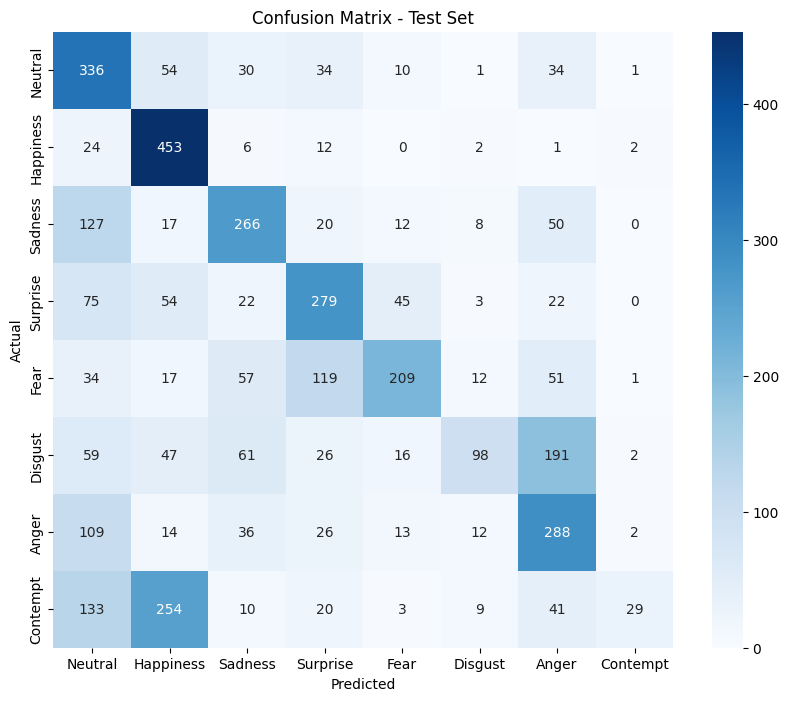

In [ ]:
import os
import tarfile
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
from torch.utils.data import Dataset, DataLoader

# Mount Google Drive
drive.mount('/content/drive')

# Define Paths
TEST_TAR_PATH = "/content/drive/MyDrive/colab_data/datasets/affect/val_set.tar"  # Update this path if needed
EXTRACTED_TEST_FOLDER = "/content/test_set/val_set/val_set/val_set"
TEST_IMAGES_FOLDER = os.path.join(EXTRACTED_TEST_FOLDER, "images")
TEST_ANNOTATIONS_FOLDER = os.path.join(EXTRACTED_TEST_FOLDER, "annotations")
MODEL_PATH = "/content/best_model.pth"  # Path to trained model

# Extract the test dataset if not already extracted
if not os.path.exists(EXTRACTED_TEST_FOLDER):
    print("Extracting test dataset... This may take a while.")
    with tarfile.open(TEST_TAR_PATH, 'r') as tar_ref:
        tar_ref.extractall(EXTRACTED_TEST_FOLDER)
    print("Test dataset extracted successfully!")
else:
    print(" Test dataset already extracted.")

#Define Test Data Transformations (Ensure Grayscale Conversion)
test_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((224, 224)),               # Resize for ResNet input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize grayscale
])

# Ensure the same class order for both training and test sets
emotion_labels = ["Neutral", "Happiness", "Sadness", "Surprise", "Fear", "Disgust", "Anger", "Contempt"]

# Manually map class indices
class_to_index = {emotion: idx for idx, emotion in enumerate(emotion_labels)}

# Convert labels in the test dataset
class AffectNetTestDataset(Dataset):
    def __init__(self, images_folder, annotations_folder, transform=None):
        self.images_folder = images_folder
        self.annotations_folder = annotations_folder
        self.image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg') or f.endswith('.png')]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_filename = self.image_files[idx]
        img_index = os.path.splitext(img_filename)[0]  # Extract numeric index
        img_path = os.path.join(self.images_folder, img_filename)

        # Load image as grayscale
        image = Image.open(img_path).convert("L")

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        # Load emotion label from annotation
        exp_file = os.path.join(self.annotations_folder, f"{img_index}_exp.npy")
        try:
            label = int(np.load(exp_file))  # Load expression label
            label = class_to_index[emotion_labels[label]]  # Map label correctly
        except FileNotFoundError:
            raise FileNotFoundError(f"Annotation file {exp_file} missing for image {img_filename}")

        return image, label

# Load Test Dataset
test_dataset = AffectNetTestDataset(TEST_IMAGES_FOLDER, TEST_ANNOTATIONS_FOLDER, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the Trained Model
print("\nLoading trained model for evaluation...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=None)  # Load model architecture

# Modify first layer for grayscale input
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Modify final layer (MATCH the structure used in training)
num_classes = 8
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(p=0.5),
    torch.nn.Linear(model.fc.in_features, num_classes)
)

# Load model weights
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model = model.to(device)
model.eval()
print(" Model loaded successfully!")

# Evaluate the Model
correct = 0
total = 0
all_preds = []
all_labels = []

print("\n Running inference on the test set...")
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get highest probability class

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute Accuracy
accuracy = correct / total
print(f"\n Model Accuracy on Test Set: {accuracy * 100:.2f}%")

#  Generate Classification Report
print("\n Classification Report:")
class_names = ["Neutral", "Happiness", "Sadness", "Surprise", "Fear", "Disgust", "Anger", "Contempt"]
print(classification_report(all_labels, all_preds, target_names=class_names))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()

Introducing Transformers at late fusion

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os
import numpy as np
from PIL import Image

#  Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#  Load Pre-trained ResNet-50
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, pretrained_model_path):
        super(ResNetFeatureExtractor, self).__init__()

        # Load ResNet-50
        resnet = models.resnet50(weights=None)
        resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        resnet.fc = nn.Identity()  # Remove classification head to extract features

        # Load weights
        checkpoint = torch.load(pretrained_model_path, map_location=device)
        new_state_dict = {k.replace("fc.1", "fc"): v for k, v in checkpoint.items()}
        resnet.load_state_dict(new_state_dict, strict=False)

        self.feature_extractor = resnet

    def forward(self, x):
        with torch.no_grad():
            x = self.feature_extractor(x)  # (Batch, 2048)
        return x  # Shape: (Batch, 2048)

#  Transformer-based Attention Module
class VisionTransformerLateFusion(nn.Module):
    def __init__(self, pretrained_model_path, num_classes=8, embed_dim=512, num_heads=8, num_layers=2):
        super(VisionTransformerLateFusion, self).__init__()

        # ResNet Feature Extractor
        self.resnet = ResNetFeatureExtractor(pretrained_model_path)  # **Outputs 2048D**

        #  Projection layer to downsample from 2048 → 512
        self.projection = nn.Linear(2048, embed_dim)  # Reduce dimension

        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=2048, dropout=0.1, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Fully connected classification layer
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        # Extract features using ResNet
        features = self.resnet(x)  # (Batch, 2048)

        #  Project features to 512 dimensions
        features = self.projection(features)  # (Batch, 512)

        # Reshape for Transformer Encoder
        features = features.unsqueeze(1)  # (Batch, 1, 512) → Needs a sequence dimension

        # Apply Transformer Encoder (self-attention over feature embeddings)
        attention_features = self.transformer_encoder(features)  # (Batch, 1, 512)

        # Extract only the first token output
        attention_features = attention_features.squeeze(1)  # (Batch, 512)

        # Final classification layer
        output = self.fc(attention_features)  # (Batch, num_classes)

        return output

#  Initialize Model with Pre-trained ResNet
pretrained_model_path = "/content/best_model.pth"  # Update this path if needed
num_classes = 8

model = VisionTransformerLateFusion(pretrained_model_path, num_classes=num_classes).to(device)
print("ResNet + Transformer model initialized successfully!")

#  Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

#  Define DataLoader (Replace `YOUR_DATASET_HERE` with actual dataset instance)
batch_size = 32

train_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((224, 224)),  # Resize for ResNet input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize grayscale
])

class AffectNetDataset(Dataset):
    def __init__(self, images_folder, annotations_folder, transform=None):
        self.images_folder = images_folder
        self.annotations_folder = annotations_folder
        self.image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg') or f.endswith('.png')]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_filename = self.image_files[idx]
        img_index = os.path.splitext(img_filename)[0]  # Extract numeric index
        img_path = os.path.join(self.images_folder, img_filename)

        # Load image as grayscale
        image = Image.open(img_path).convert("L")

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        # Load emotion label from annotation
        exp_file = os.path.join(self.annotations_folder, f"{img_index}_exp.npy")
        try:
            label = int(np.load(exp_file))  # Load expression label
        except FileNotFoundError:
            raise FileNotFoundError(f"Annotation file {exp_file} missing for image {img_filename}")

        return image, label
#  Initialize Dataset
DATASET_PATH = "/content/affectnet/train_set"
IMAGES_FOLDER = os.path.join(DATASET_PATH, "images")
ANNOTATIONS_FOLDER = os.path.join(DATASET_PATH, "annotations")

train_dataset = AffectNetDataset(IMAGES_FOLDER, ANNOTATIONS_FOLDER, transform=train_transforms)

# Define DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)

#  Training Loop
num_epochs = 10

print("\nStarting Training...\n")

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_loss = running_loss / len(train_loader)
    accuracy = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

    # Save model if it achieves the best validation loss
    if avg_loss < best_val_loss:
        best_val_loss = avg_loss
        torch.save(model.state_dict(),"/content/best_model2.pth")
        print(f" Model improved and saved" )

print("\nTraining complete! Model saved at:", "/content/best_model2.pth")

Using device: cuda
✅ ResNet + Transformer model initialized successfully!

Starting Training...

Epoch [1/10] - Loss: 0.7241, Accuracy: 74.41%
Epoch [2/10] - Loss: 0.7061, Accuracy: 74.97%
Epoch [3/10] - Loss: 0.7003, Accuracy: 75.11%
Epoch [4/10] - Loss: 0.6970, Accuracy: 75.25%
Epoch [5/10] - Loss: 0.6949, Accuracy: 75.25%
Epoch [6/10] - Loss: 0.6932, Accuracy: 75.29%
Epoch [7/10] - Loss: 0.6922, Accuracy: 75.37%
Epoch [8/10] - Loss: 0.6903, Accuracy: 75.39%
Epoch [9/10] - Loss: 0.6890, Accuracy: 75.40%
Epoch [10/10] - Loss: 0.6884, Accuracy: 75.40%
✅ Model improved and saved

✅ Training complete! Model saved at: /content/best_model2.pth


test transformer-resnet

Using device: cuda
✅ Model loaded successfully!

🔍 Running inference on the test set...

 Model Accuracy on Test Set: 15.35%

 Classification Report:
              precision    recall  f1-score   support

     Neutral       0.14      0.71      0.24       500
   Happiness       0.17      0.13      0.15       500
     Sadness       0.00      0.00      0.00       500
    Surprise       0.33      0.39      0.36       500
        Fear       0.00      0.00      0.00       500
     Disgust       0.01      0.00      0.00       500
       Anger       0.00      0.00      0.00       500
    Contempt       0.00      0.00      0.00       499

    accuracy                           0.15      3999
   macro avg       0.08      0.15      0.09      3999
weighted avg       0.08      0.15      0.09      3999



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


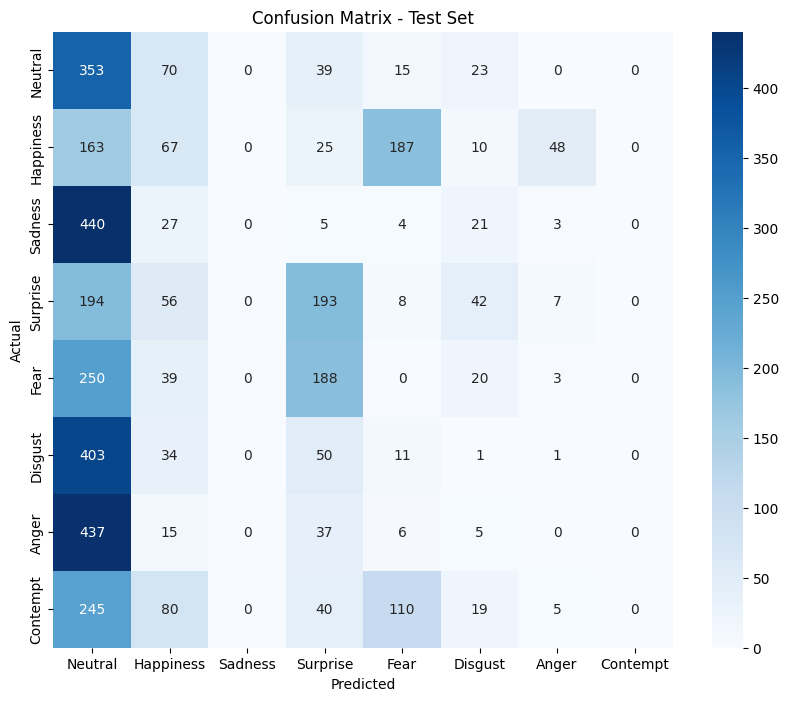

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os
import numpy as np
from PIL import Image

#  Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#  Load Pre-trained ResNet-50
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, pretrained_model_path, output_dim=512):  #  Now accepts `output_dim`
        super(ResNetFeatureExtractor, self).__init__()

        # Load ResNet-50
        resnet = models.resnet50(weights=None)
        resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        resnet.fc = nn.Identity()  # Remove classification head to extract features

        # Load weights
        checkpoint = torch.load(pretrained_model_path, map_location=device)
        new_state_dict = {k.replace("fc.1", "fc"): v for k, v in checkpoint.items()}
        resnet.load_state_dict(new_state_dict, strict=False)

        self.feature_extractor = resnet

        #  Projection layer to convert from 2048 → output_dim (512 by default)
        self.projection = nn.Linear(2048, output_dim)

    def forward(self, x):
        with torch.no_grad():
            x = self.feature_extractor(x)  # (Batch, 2048)
            x = self.projection(x)  #  Now outputs (Batch, output_dim)
        return x

# Transformer-based Attention Module
class VisionTransformerLateFusion(nn.Module):
    def __init__(self, pretrained_model_path, num_classes=8, embed_dim=512, num_heads=8, num_layers=2):
        super(VisionTransformerLateFusion, self).__init__()

        # Use `output_dim=embed_dim` to ensure compatibility
        self.resnet = ResNetFeatureExtractor(pretrained_model_path, output_dim=embed_dim)

        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=1024, dropout=0.1, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Fully connected classification layer
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        # Extract features using ResNet
        features = self.resnet(x)  # (Batch, 512)  Now matches Transformer input

        # Reshape for Transformer Encoder
        features = features.unsqueeze(1)  # (Batch, 1, 512) → Needs a sequence dimension

        # Apply Transformer Encoder (self-attention over feature embeddings)
        attention_features = self.transformer_encoder(features)  # (Batch, 1, 512)

        # Extract only the first token output
        attention_features = attention_features.squeeze(1)  # (Batch, 512)

        # Final classification layer
        output = self.fc(attention_features)  # (Batch, num_classes)

        return output

#  Initialize the Model with Pre-trained Weights
pretrained_model_path = "/content/best_model.pth"  # Ensure this is the correct trained model path
num_classes = 8

# Load Vision Transformer model
model = VisionTransformerLateFusion(pretrained_model_path, num_classes=num_classes).to(device)

#  Load Model Weights with Strict=False to Ignore Mismatches
checkpoint = torch.load(pretrained_model_path, map_location=device)
model.load_state_dict(checkpoint, strict=False)

model.eval()
print("Model loaded successfully!")

# Evaluate the Model
correct = 0
total = 0
all_preds = []
all_labels = []

print("\n🔍 Running inference on the test set...")
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get highest probability class

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute Accuracy
accuracy = correct / total
print(f"\n Model Accuracy on Test Set: {accuracy * 100:.2f}%")

#  Generate Classification Report
print("\n Classification Report:")
class_names = ["Neutral", "Happiness", "Sadness", "Surprise", "Fear", "Disgust", "Anger", "Contempt"]
print(classification_report(all_labels, all_preds, target_names=class_names))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()

In [ ]:
from google.colab import files
import zipfile

# Step 1: Upload the zipped dataset
uploaded = files.upload()

# Step 2: Unzip the dataset
for filename in uploaded.keys():
    if filename.endswith(".zip"):
        print(f"Unzipping {filename}...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall("/content/fer")
        print("Dataset unzipped successfully!")

# Step 3: Verify dataset location
DATASET_PATH = "/content/fer"
print(f"Dataset is stored at: {DATASET_PATH}")

Saving fer_with_training_testing_split_4000.zip to fer_with_training_testing_split_4000.zip
Unzipping fer_with_training_testing_split_4000.zip...
Dataset unzipped successfully!
Dataset is stored at: /content/fer


Using device: cuda
Loading testing dataset...

Testing Dataset Class Distribution:
  angry: 800 samples
  disgust: 800 samples
  fear: 800 samples
  happy: 800 samples
  neutral: 800 samples
  sad: 800 samples
  surprise: 800 samples

Initializing ResNet50 model...
Model loaded and ready for testing!

Starting Testing...


Testing Progress: 100%|██████████| 175/175 [00:07<00:00, 23.58it/s]



Testing completed!

Evaluating results...
Accuracy: 0.6318
Macro Precision: 0.6297, Macro Recall: 0.6318, Macro F1: 0.6281
Micro Precision: 0.6318, Micro Recall: 0.6318, Micro F1: 0.6318

Generating Confusion Matrix...


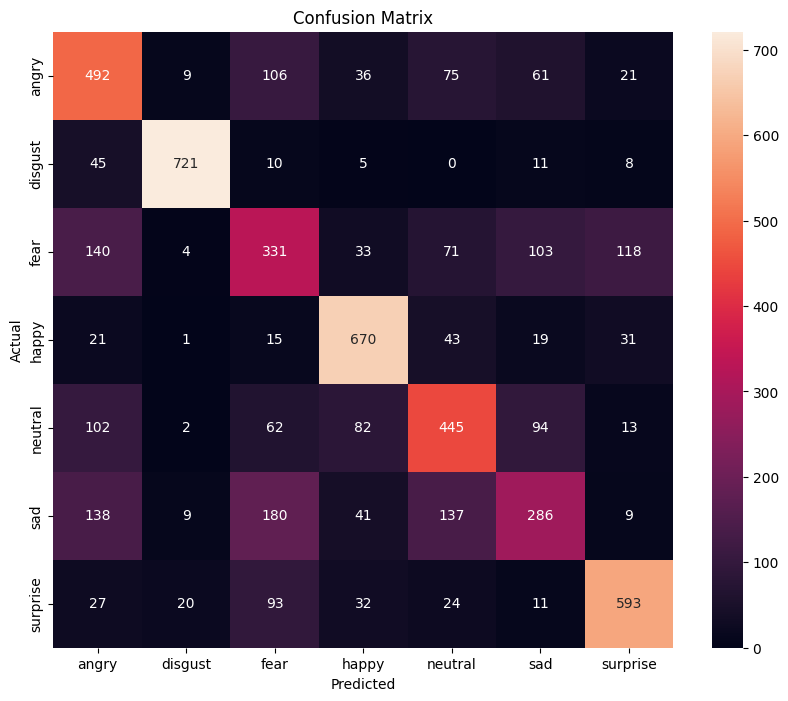

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Paths
TEST_PATH = "/content/fer/test"  # Path to the testing dataset created after split
MODEL_PATH = "/content/resnet50_emotion_transfer_10_epochs.pth"  # Trained model

# Define transformations
test_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((224, 224)),               # Resize to ResNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize for grayscale
])

# Define custom dataset for testing
class TestImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.classes = sorted(os.listdir(root_dir))  # Sort classes alphabetically
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}

        for class_name in self.classes:
            class_path = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_path):
                self.data.append((os.path.join(class_path, img_name), self.class_to_idx[class_name]))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        img = Image.open(img_path).convert("L")  # Convert to grayscale
        if self.transform:
            img = self.transform(img)
        return img, label

# Load the testing dataset
print("Loading testing dataset...")
test_dataset = TestImageDataset(root_dir=TEST_PATH, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Print dataset statistics
class_counts = {cls: 0 for cls in test_dataset.classes}
for _, label in test_dataset:
    class_counts[test_dataset.classes[label]] += 1
print("\nTesting Dataset Class Distribution:")
for class_name, count in class_counts.items():
    print(f"  {class_name}: {count} samples")

# Initialize and load ResNet50 model
print("\nInitializing ResNet50 model...")
model = models.resnet50(pretrained=False)  # Create a new ResNet18 instance

# Modify the first convolutional layer to accept 1-channel grayscale input
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Modify the final fully connected layer for emotion classes
num_classes = len(test_dataset.classes)  # Match the number of classes
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# Load the saved state dictionary into the model
state_dict = torch.load(MODEL_PATH, map_location=device)  # Load weights to CPU or GPU
model.load_state_dict(state_dict)
model = model.to(device)
model.eval()  # Set model to evaluation mode
print("Model loaded and ready for testing!")

# Testing the model
print("\nStarting Testing...")
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(tqdm(test_loader, desc="Testing Progress")):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        # Collect predictions and labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("\nTesting completed!")

# Evaluate the model
print("\nEvaluating results...")
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average=None)
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="macro")
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="micro")

# Print accuracy and metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {macro_precision:.4f}, Macro Recall: {macro_recall:.4f}, Macro F1: {macro_f1:.4f}")
print(f"Micro Precision: {micro_precision:.4f}, Micro Recall: {micro_recall:.4f}, Micro F1: {micro_f1:.4f}")

# Confusion matrix
print("\nGenerating Confusion Matrix...")
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

2nd attempt, more aggressive data balancing

In [ ]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from collections import Counter
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
from sklearn.model_selection import train_test_split

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset paths
DATASET_PATH = "/content/affectnet/train_set"
IMAGES_FOLDER = os.path.join(DATASET_PATH, "images")
ANNOTATIONS_FOLDER = os.path.join(DATASET_PATH, "annotations")

# Define emotion labels
emotion_labels = {
    0: "Neutral", 1: "Happiness", 2: "Sadness", 3: "Surprise",
    4: "Fear", 5: "Disgust", 6: "Anger", 7: "Contempt"
}

def augmentation_transform(is_minority=False):
    base_transforms = [
        A.HorizontalFlip(p=0.3),
        A.RandomBrightnessContrast(p=0.2),
        A.GaussianBlur(blur_limit=(3, 5), p=0.2),
        A.Rotate(limit=5, p=0.2),
        A.RandomResizedCrop(224, 224, scale=(0.8, 1.0), p=0.3),
        A.Normalize(mean=[0.5], std=[0.5]),
        ToTensorV2(),
    ]

    if is_minority:
        base_transforms.extend([
            A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.3),
            A.CoarseDropout(max_holes=3, max_height=20, max_width=20, min_holes=1, p=0.2),
            A.HueSaturationValue(p=0.2)  # Color jitter only for minority classes
        ])

    return A.Compose(base_transforms)


# Custom Dataset
class AffectNetDataset(Dataset):
    def __init__(self, images_folder, annotations_folder, transform=None):
        self.images_folder = images_folder
        self.annotations_folder = annotations_folder
        self.image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg') or f.endswith('.png')]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_filename = self.image_files[idx]
        img_index = os.path.splitext(img_filename)[0]  # Get numeric index
        img_path = os.path.join(self.images_folder, img_filename)

        # Load image and convert to grayscale
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"Image {img_path} not found.")

        image = np.expand_dims(image, axis=-1)  # Add channel dimension

        # Load annotation
        try:
            exp = int(np.load(os.path.join(self.annotations_folder, f"{img_index}_exp.npy")))
        except Exception as e:
            raise FileNotFoundError(f"Missing annotation for {img_index}: {e}")

        # Apply augmentation
        if self.transform:
            image = self.transform(image=image)["image"]
        else:
            image = transforms.ToTensor()(image)  # Convert to PyTorch tensor

        return image, exp

# Load Dataset and Create Train/Validation Split
full_dataset = AffectNetDataset(IMAGES_FOLDER, ANNOTATIONS_FOLDER, transform=augmentation_transform())

train_indices, val_indices = train_test_split(
    range(len(full_dataset)), test_size=0.1,
    stratify=[full_dataset[i][1] for i in range(len(full_dataset))],
    random_state=42
)
train_subset = torch.utils.data.Subset(full_dataset, train_indices)
val_subset = torch.utils.data.Subset(full_dataset, val_indices)

# Compute Class Distribution
class_counts = Counter([label for _, label in train_subset])
num_classes = len(emotion_labels)

print("\nTraining Dataset Class Distribution:")
for class_idx, count in class_counts.items():
    print(f"{emotion_labels[class_idx]}: {count} samples")

# Compute Adjusted Class Weights
class_weights = torch.tensor(
    [1 / np.sqrt(class_counts[i] + 1) for i in range(num_classes)], dtype=torch.float32
).to(device)

# Weighted Loss Function
weighted_loss_function = nn.CrossEntropyLoss(weight=class_weights)

# Compute Sample Weights for Balanced Sampling
sample_weights = np.array([1.0 / np.sqrt(class_counts[label] + 1) for _, label in train_subset])
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# DataLoaders
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Initialize ResNet-50 for Transfer Learning
print("\nInitializing ResNet50...")
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

# Modify first convolutional layer for grayscale input
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Modify final fully connected layer for emotion classification
in_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(in_features, num_classes)
).to(device)

# Move model to GPU/CPU
model = model.to(device)

# Define optimizer and scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", patience=2, factor=0.5, verbose=True)

# Early Stopping Setup
patience = 3
best_val_loss = float('inf')
patience_counter = 0

# Training Loop with Early Stopping
num_epochs = 10
print("\nStarting Training...\n")
start_time = time.time()

for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0.0
    print(f"Epoch [{epoch+1}/{num_epochs}] in progress...")

    for batch_idx, (images, labels) in enumerate(train_loader, start=1):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = weighted_loss_function(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # Validation Phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = weighted_loss_function(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    # Update Learning Rate Scheduler
    scheduler.step(avg_val_loss)

    # Early Stopping Check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "/content/best_model.pth")
        print(" Validation loss improved, saving model!")
    else:
        patience_counter += 1
        print(f"No improvement for {patience_counter}/{patience} epochs.")

    if patience_counter >= patience:
        print("\nEarly stopping triggered!")
        break

print(f"\nTraining complete in {(time.time() - start_time) / 60:.2f} minutes")

# Load Best Model Before Testing
model.load_state_dict(torch.load("/content/best_model.pth"))
print(" Loaded best model from early stopping checkpoint.")

Using device: cuda

Training Dataset Class Distribution:
Neutral: 67386 samples
Happiness: 120973 samples
Sadness: 22913 samples
Anger: 22394 samples
Surprise: 12681 samples
Contempt: 3375 samples
Fear: 5740 samples
Disgust: 3423 samples

Initializing ResNet50...

Starting Training...

Epoch [1/10] in progress...


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/10] - Training Loss: 1.3224, Validation Loss: 1.2114
 Validation loss improved, saving model!
Epoch [2/10] in progress...
Epoch [2/10] - Training Loss: 1.1624, Validation Loss: 1.1192
 Validation loss improved, saving model!
Epoch [3/10] in progress...
Epoch [3/10] - Training Loss: 1.1096, Validation Loss: 1.0737
 Validation loss improved, saving model!
Epoch [4/10] in progress...
Epoch [4/10] - Training Loss: 1.0826, Validation Loss: 1.0410
 Validation loss improved, saving model!
Epoch [5/10] in progress...
Epoch [5/10] - Training Loss: 1.0687, Validation Loss: 1.0499
No improvement for 1/3 epochs.
Epoch [6/10] in progress...
Epoch [6/10] - Training Loss: 1.0565, Validation Loss: 1.0368
 Validation loss improved, saving model!
Epoch [7/10] in progress...
Epoch [7/10] - Training Loss: 1.0495, Validation Loss: 1.0322
 Validation loss improved, saving model!
Epoch [8/10] in progress...
Epoch [8/10] - Training Loss: 1.0444, Validation Loss: 1.0278
 Validation loss improved, savi

test model trained on affectnet on fer test set

Using device: cuda
Label Mapping (Model → Test Set): {6: 0, 5: 1, 4: 2, 1: 3, 0: 4, 2: 5, 3: 6}
Test dataset size: 5600
Number of batches in test loader: 175

Loading trained model for evaluation...
Model loaded successfully!

Running inference on the test set...
Processing batch 1/175, Batch size: 32
Predicted raw outputs: [3 3 1 3 3 4 3 3 3 4 2 3 4 3 0 3 3 3 3 3 6 1 3 3 3 4 3 3 4 3 3 3]
Mapped Predictions: [6, 6, 3, 6, 6, 2, 6, 6, 6, 2, 5, 6, 2, 6, 4, 6, 6, 6, 6, 6, 0, 3, 6, 6, 6, 2, 6, 6, 2, 6, 6, 6]
Processing batch 2/175, Batch size: 32
Predicted raw outputs: [3 3 3 3 4 1 3 4 3 4 3 0 3 3 3 3 3 3 3 3 4 3 4 3 1 3 4 4 1 4 4 3]
Mapped Predictions: [6, 6, 6, 6, 2, 3, 6, 2, 6, 2, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6, 3, 6, 2, 2, 3, 2, 2, 6]
Processing batch 3/175, Batch size: 32
Predicted raw outputs: [3 3 3 1 3 3 3 3 3 3 4 1 3 3 4 6 6 3 3 0 4 3 0 0 1 3 3 4 3 1 3 3]
Mapped Predictions: [6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 2, 3, 6, 6, 2, 0, 0, 6, 6, 4, 2, 6, 4, 4, 3, 6, 6, 2, 6, 3, 6, 6]
P

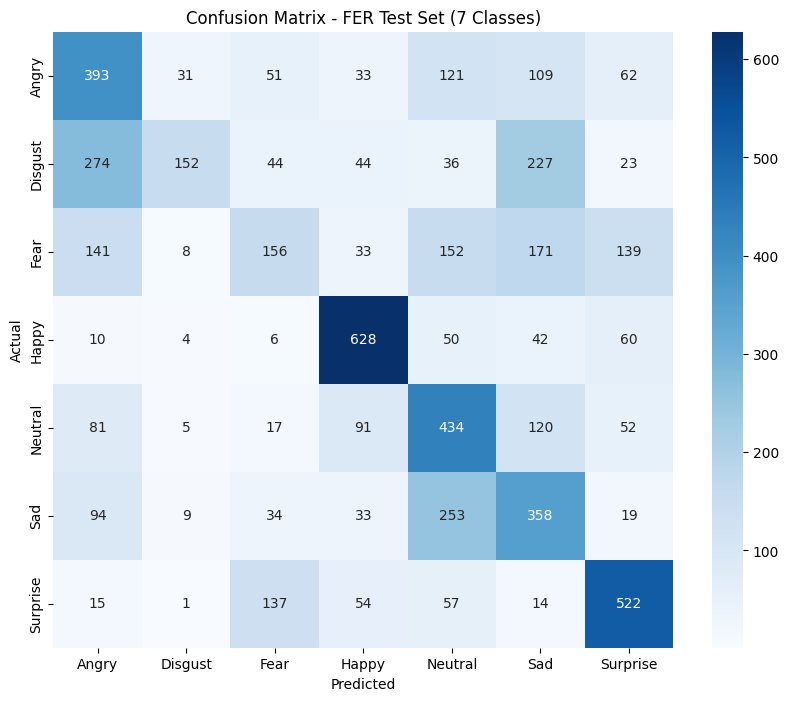

In [ ]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, Dataset

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Test Dataset Path
TEST_IMAGES_FOLDER = "/content/fer/test"
MODEL_PATH = "/content/best_model.pth"  # Path to the trained model

# Emotion Labels for the Test Dataset (7 Classes)
test_emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

# Model Emotion Labels (8 Classes)
model_emotion_labels = ["Neutral", "Happiness", "Sadness", "Surprise", "Fear", "Disgust", "Anger", "Contempt"]

# **Fix Label Mapping to Match Model Classes**
label_mapping = {
    6: 0,  # Angry -> Angry
    5: 1,  # Disgust -> Disgust
    4: 2,  # Fear -> Fear
    1: 3,  # Happiness -> Happy
    0: 4,  # Neutral -> Neutral
    2: 5,  # Sadness -> Sad
    3: 6   # Surprise -> Surprise
}

# Debug: Print Label Mapping
print(f"Label Mapping (Model → Test Set): {label_mapping}")

# Define Test Data Transformations
test_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Custom Dataset for Test Data
class FERTestDataset(Dataset):
    def __init__(self, images_folder, transform=None):
        self.images_folder = images_folder
        self.class_folders = [f.lower() for f in os.listdir(images_folder) if os.path.isdir(os.path.join(images_folder, f))]
        self.transform = transform
        self.samples = []

        # Ensure test_emotion_labels are also lowercase for matching
        lowercase_labels = [label.lower() for label in test_emotion_labels]

        for class_name in self.class_folders:
            class_path = os.path.join(images_folder, class_name)
            if class_name in lowercase_labels:
                class_idx = lowercase_labels.index(class_name)  # Get the correct index
                for img_file in os.listdir(class_path):
                    if img_file.endswith('.jpg') or img_file.endswith('.png'):
                        self.samples.append((os.path.join(class_path, img_file), class_idx))
            else:
                print(f"⚠ Warning: Found unexpected class folder '{class_name}' in the dataset. Skipping.")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("L")  # Convert to grayscale
        if self.transform:
            image = self.transform(image)
        return image, label

# Load Test Dataset
test_dataset = FERTestDataset(TEST_IMAGES_FOLDER, transform=test_transforms)

# Debug: Check dataset size
print(f"Test dataset size: {len(test_dataset)}")

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Debug: Check number of batches
print(f"Number of batches in test loader: {len(test_loader)}")

# Load the Model
print("\nLoading trained model for evaluation...")
model = models.resnet50()
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(p=0.5),
    torch.nn.Linear(model.fc.in_features, len(model_emotion_labels))  # Model trained on 8 classes
)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model = model.to(device)
model.eval()
print("Model loaded successfully!")

# Evaluate the Model on the 7-Class Dataset
correct = 0
total = 0
all_preds = []
all_labels = []

print("\nRunning inference on the test set...")
with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(test_loader):
        images = images.to(device)

        # Debug: Check batch sizes
        print(f"Processing batch {batch_idx + 1}/{len(test_loader)}, Batch size: {images.shape[0]}")

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Debug: Print some predictions
        print(f"Predicted raw outputs: {predicted.cpu().numpy()}")

        # Map the model's 8-class predictions to the 7-class space
        predicted = predicted.cpu().numpy()
        mapped_preds = []
        valid_labels = []

        for i, pred in enumerate(predicted):
            if pred in label_mapping:
                mapped_preds.append(label_mapping[pred])
                valid_labels.append(labels[i].item())  # Only keep valid labels
            else:
                print(f"Skipping prediction: {pred}, as it has no mapped label.")  # Debugging

        # Debug: Print mapped predictions
        print(f"Mapped Predictions: {mapped_preds}")

        if mapped_preds:  # Ensure predictions exist before adding
            all_preds.extend(mapped_preds)
            all_labels.extend(valid_labels)

        total += len(valid_labels)  # Only count valid samples
        correct += sum(1 for p, l in zip(mapped_preds, valid_labels) if p == l)

# Prevent ZeroDivisionError
accuracy = correct / total if total > 0 else 0
print(f"\nModel Accuracy on FER Test Set: {accuracy * 100:.2f}%")

# Debug: Print actual vs predicted counts
print(f"Total samples processed: {total}")
print(f"Total correct predictions: {correct}")

# Generate Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=test_emotion_labels))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_emotion_labels, yticklabels=test_emotion_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - FER Test Set (7 Classes)")
plt.show()